# Task 3 - Clustering (34 points)

**Task Description:** A student who has not attended this course yet but who is interested in data mining tried to cluster two datasets. Unfortunately, they did not succeed and asked you for some help. In this task, you will read what the student said about their experience and help them by describing the data and the clustering algorithms. You will also try out the clustering algorithms yourself to make sure that your recommendations are correct.

**Quality Assessment:** To encourage you not to use AI tools and to write the solutions yourself, we will deduct additional points if your solutions are consequently weird (e.g. describe clusters as "precise" or "irregular") or do not answer the question. If you write the solutions yourself, paying attention to the task description, this should not affect you (even if you make some mistakes). However, if you copy answers form AI tools, which often use weird words or return irrelevant solutions, you will most likely get negative points, reducing the total points you get for this assignment.

**Input:** The data folder contains the input files (`dataset1.csv`, `dataset2.csv`). In each dataset the data points have 2 features and 1 class label. Do not forget to exclude the data that should not be considered for clustering when you apply the algorithms on the datasets.

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
# import seaborn as sb
from sklearn import cluster, mixture, metrics

## 3.1 Dataset 1 (15 points)

Student: "I've read that K-Means is usually the default algorithm to cluster datasets as it needs only the number of clusters to be specified. I could figure out how to run it but the results are really bad, it splits the clusters in a really weird way."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

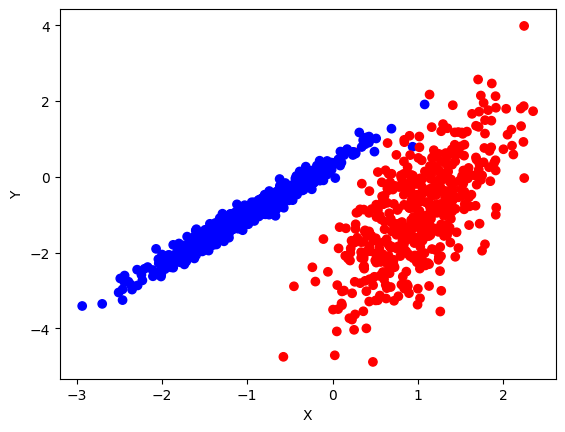

In [2]:
# Load dataset1.csv
data = pd.read_csv("data/dataset1.csv")
X1 = data[["X", "Y"]].values  
y1 = data["label"].values     

plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap="bwr")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

2 clusters are depicted:
- One cluster seems to be a gaussian distribution that is somewhat like a very skewed oval (direction from bototm left to top right).
- The second cluster is more like a slightly skewed oval (from bottom left to top right), again a gaussian distribution.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

K-means is not a good idea, because it assumes that all clusters will be of the similar size and have circular shape (it also assumes similar density but that isn't so relevant here and it also works best when we have gaussian distributions, which in this case we do). While gaussian distribution is something we actually have, the other 2 important assumptions are not there.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

For this specific dataset I would suggest using expectation maximiztion. To me it honestly seems like a perfect fit since it can discribe gaussian distributions of different oval like shapes and size, which is exactly what we have in this case.

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

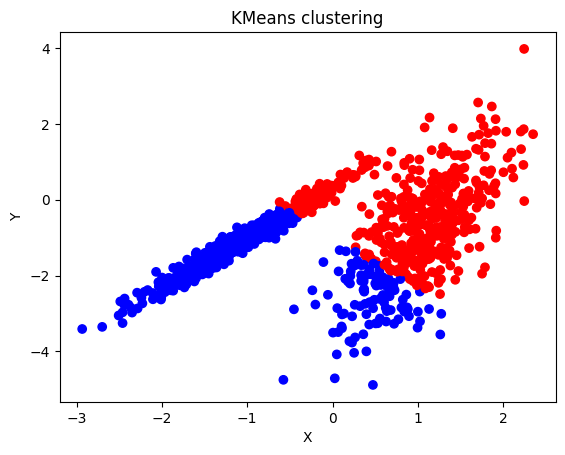

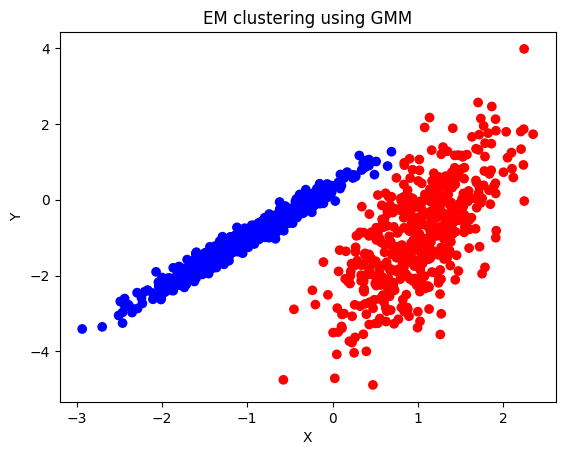

In [3]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X1)

exp_max = mixture.GaussianMixture(n_components=2, covariance_type="full")
exp_max_labels = exp_max.fit_predict(X1)

# KMeans result
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_labels, cmap="bwr")
plt.title("KMeans clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# EM result
plt.scatter(X1[:, 0], X1[:, 1], c=exp_max_labels, cmap="bwr")
plt.title("EM clustering using GMM")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [4]:
nmi_kmeans = metrics.normalized_mutual_info_score(y1, kmeans_labels)
nmi_exp_max = metrics.normalized_mutual_info_score(y1, exp_max_labels)

print("-- NMI --")
print(f"KMeans: {nmi_kmeans:.3f}")
print(f"EM: {nmi_exp_max:.3f}")

ari_kmeans = metrics.adjusted_rand_score(y1, kmeans_labels)
ari_exp_max = metrics.adjusted_rand_score(y1, exp_max_labels)

print("-- ARS --")
print(f"KMeans: {ari_kmeans:.3f}")
print(f"EM: {ari_exp_max:.3f}")

-- NMI --
KMeans: 0.253
EM: 0.962
-- ARS --
KMeans: 0.329
EM: 0.984


## 3.2 Dataset 2 (15 points)

Student: "I have no clue what's wrong with K-Means so I tried the AgglomerativeClustering model from sklearn on the other dataset. I used it with average linkage to cluster the data, I guess I should get an average or better result with it?? I set n_clusters to the correct number of clusters but it seems to have put everything into a single cluster..."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

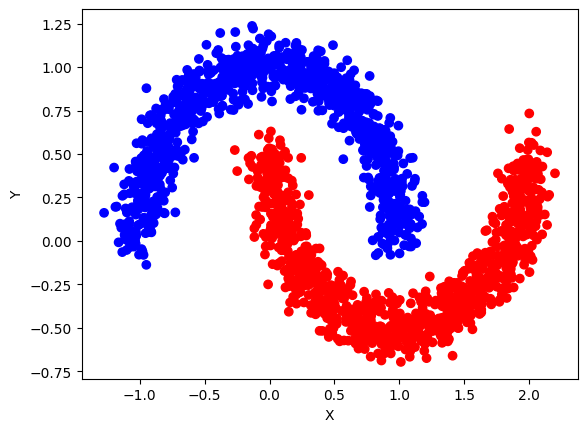

In [5]:
# Load dataset2.csv
data = pd.read_csv("data/dataset2.csv")
X2 = data[["X", "Y"]].values  
y2 = data["label"].values     

plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap="bwr")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

The data has 2 clusters, one has a "U" shape and the other an upside down "U". Think of it as having the upside "U" cluster and then the regular "U" cluster starting from the middle of the upside down cluster. It's like the start of a spiral and there seems to be no noise in the data, so they are well seperated.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

The problem with the algorithm is how it merges clusters. The linkage functions it uses work very poorly on these spiral like data, because the start of th U's are fairly close to eachother and thus it might assume that those are actually a cluster on their own. So it can't really follow the pattern of the data and might merge parts of different clusters.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

Out of all the algorithms that we have been taught, there is none more fitting for this than DBSCAN, since it faces no problems when faced with weirdly clustered data, such as the one in dataset2.

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

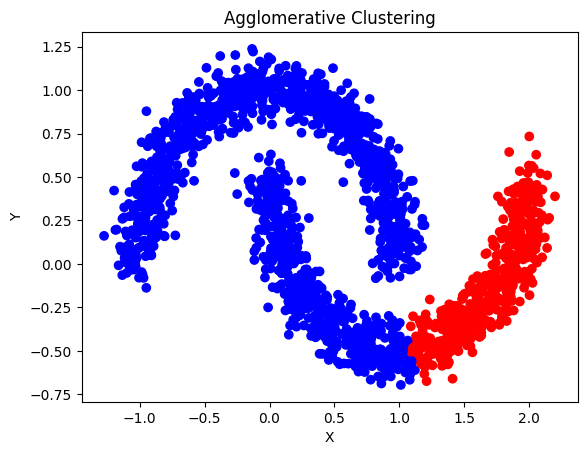

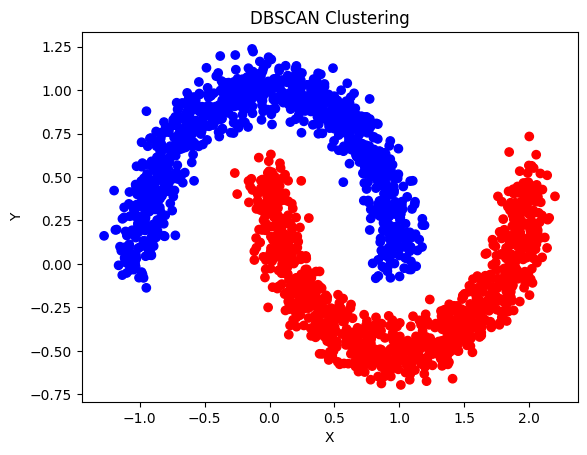

In [6]:
# Agglomerative Clustering
agglo = cluster.AgglomerativeClustering(n_clusters=2, linkage="average")
agglo_labels = agglo.fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=agglo_labels, cmap="bwr")
plt.title("Agglomerative Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# DBSCAN Clustering
dbscan = cluster.DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=dbscan_labels, cmap="bwr")
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [7]:
nmi_agglo = metrics.normalized_mutual_info_score(y2, agglo_labels)
nmi_dbscan = metrics.normalized_mutual_info_score(y2, dbscan_labels)

print("-- NMI --")
print(f"Agglomerative: {nmi_kmeans:.3f}")
print(f"DBSCAN: {nmi_dbscan:.3f}")

ari_agglo = metrics.adjusted_rand_score(y2, agglo_labels)
ari_dbscan = metrics.adjusted_rand_score(y2, dbscan_labels)

print("-- ARS --")
print(f"Agglomerative: {ari_agglo:.3f}")
print(f"DBSCAN: {ari_dbscan:.3f}")

-- NMI --
Agglomerative: 0.253
DBSCAN: 1.000
-- ARS --
Agglomerative: 0.225
DBSCAN: 1.000


## 3.3 Literature (4 points)

Recommend the student 2 sources that could help them to learn more about clustering. The sources you recommend can be in any format (book, article, blog, video, interactive tutorial, etc.) but it should have a good quality. The topic should be clustering in general or the clustering algorithms you used. State the full urls of the websites (or cite the books properly) and write 3 examples what the student could learn from each.


1. https://www.geeksforgeeks.org/machine-learning/clustering-in-machine-learning/
You can learn:
    1. The basic idea of what clustering is and how it works.
    2. Some places where clustering can be used.
    3. Brief description of plenty of clustering methods.
Overall a good read to get started with clustering.

2. https://www.ibm.com/think/topics/clustering
You can learn:
    1. Yet again the basic idea of what clustering is and how it works.
    2. Types of clustering.
    3. Areas where clustering can be applied in a practical setting.
Another informatve read in my opinion.